[1] 15  2

[1] 15  1

8


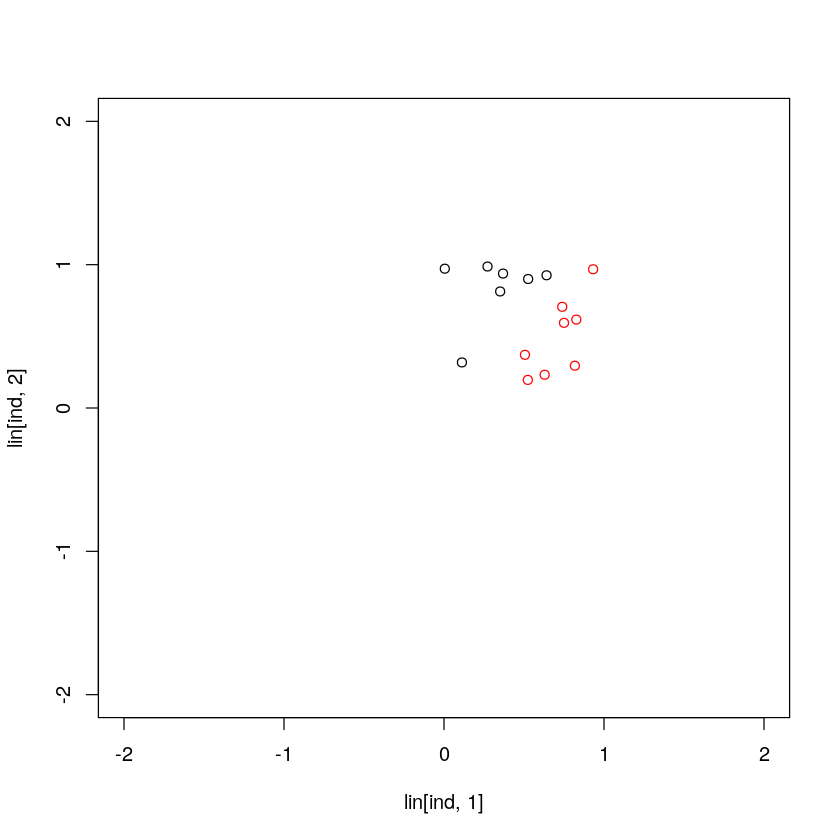

In [29]:

lin <- read.csv("lineal.csv",header = F)
ind=which(lin[,3]==0)
plot(lin[ind,1],lin[ind,2],type="p",xlim=c(-2,2),ylim=c(-2,2))
lines(lin[-ind,1],lin[-ind,2],type="p",col="red")
a<-as.matrix(lin[,-3])
dim(a)
# [1] 15 2
b<-as.matrix(lin[,3])
dim(b)
#[1] 15 1
# Producto escalar c(1,2,3)%*%c(3,2,1)
t(b)%*%b
#8
#Incluir el bias:
ap <- a
a <- cbind(a,rep(1,nrow(a)))

In [30]:
activation <- function(z) {
    1/(1 + exp(-z))
}


neurons <- c(ncol(a),ncol(b))
W <- matrix(data = runif(prod(neurons), min = -1, max = 1),
nrow = neurons[2], ncol = neurons[1]) #nrow = neurons[1], ncol = neurons[2]

bout <- activation(a %*% t(W)) # activation(a %*% W)

eta = 0.01
error <- b-bout
aux<- error*bout*(1-bout)
Wdelta <- eta*t(aux)%*%a

W = W + Wdelta

In [31]:
backprop <- function(y,x, epochs = 10, eta = 0.1){
    neurons <- c(ncol(x),ncol(y))
    W <- matrix(data = runif(prod(neurons), min = -1, max = 1),
    nrow = neurons[2], ncol = neurons[1])
    bout <- activation(x %*% t(W))
    
    for(i in 1:epochs){
        
        error <- y-bout
        aux<- error*bout*(1-bout)
        Wdelta <- eta*t(aux)%*%x

        W = W + Wdelta
        bout <- activation(x %*% t(W))
        
    }
    
    
    return(bout)
}

In [33]:
boutNew = backprop(b,a, epochs = 10000, eta = 0.1)
cbind(boutNew,b)

2.537190e-04,0
9.287641e-01,1
3.591088e-02,0
9.062579e-01,1
2.046044e-03,0
9.925414e-01,1
9.777750e-01,1
4.636924e-06,0
1.425606e-01,0
9.911678e-01,1
9.977926e-01,1


<div class="alert alert-warning" role="alert">
  

<h1>TAREA (los BONUS 1 y 2 son opcionales):</h1>
<p>

Generalizar la función backprop anterior para que contemple la inclusión de
una capa oculta. Aplicar la función al ejemplo de la clasificación circular.
Si se fija el número máximo de épocas en 1000. ¿Qué número de neuronas
ocultas y qué valor de la tasa de aprendizaje (eta) es óptimo para este
problema? (basta una solución aproximada).
<hr>

__BONUS 1-__ ¿Sabrías incluir un término de inercia en el método de
backpropagation (ver transparencia 4)?

__BONUS 2-__ Generalizar a un número arbitrario de capas (recomendación,
        definir los pesos como una lista de matrices, una para cada capa).</p>
</div>

In [34]:
activation <- function(z) {
    1/(1 + exp(-z))
}

#activationDer <- function(z){
#    exp(-z)/(exp(-z) + 1)^2
#}
#
#activationDerAlter <- function(z){
#    activation(z) * (1- activation(z))
#}

comOut <- function(x, W){
    #Funcion que computa el output de la red
    nW = length(W)
    val = cbind(x,rep(1,nrow(x))) #Valor inicial a multiplicar por W y activar 
    A = list()
    for (i in 1:nW){
        
        #print(val)
        val = val %*% t(W[[i]])
        if (i != nW){
            val = cbind(val,rep(1,nrow(val)))
        }
        A[[i]] = activation(val)
        
        
    }
    #print(val)
    return(A)
    
}

backprop_mlp <- function(y, x, h, epochs = 10, eta = 0.1){
    neurons = c(ncol(x),h,ncol(y))
    #print(neurons)
    n = length(neurons)-1
    W = list()
    for (i in 1:n){
        W[[i]] = matrix(data = runif((neurons[i]+1)*neurons[i+1], min = -1, max = 1),
                 nrow = neurons[i+1], ncol = neurons[i]+1)
    }
    
    
    # Dentro del for
    d = 0
    A = comOut(x,W)
    
    ex = length(neurons)
    
    for (i in 1:epochs){
        for (i in 1:n){
            o = ex - i
            if (o == n){
                d = ((y-A[[o]])*A[[o]]*(1-A[[o]]))
                
            }else{
                Wf = W[[o+1]]
                val = dim(Wf)[2]
                Af = A[[o]]
                
                if (dim(Wf)[1]==1){
                    Wf = Wf[-val]
                }else{
                    Wf = Wf[,-val]
                }
                
                d = d%*%Wf*Af[,-val]*(1-Af[,-val])
            }
            if (o == 1){
                W[[o]] = W[[o]]+eta * t(d)%*%cbind(x,rep(1,nrow(x)))
            }else{
                W[[o]] = W[[o]]+eta * t(d)%*%A[[o-1]]
            }
        }
        A = comOut(x,W)
    }
    
    ###Fin del for
    
    
    return(A)
    
    
}

In [35]:
A = backprop_mlp(b,ap,c(3),epochs = 10000, eta = 0.1)
n = length(A)
val <- cbind(A[[n]],b)

In [36]:
val

1.247116e-06,0
9.830974e-01,1
4.052918e-03,0
9.702418e-01,1
3.699824e-05,0
9.996111e-01,1
9.975196e-01,1
1.918113e-09,0
4.366628e-02,0
9.994523e-01,1
9.999460e-01,1


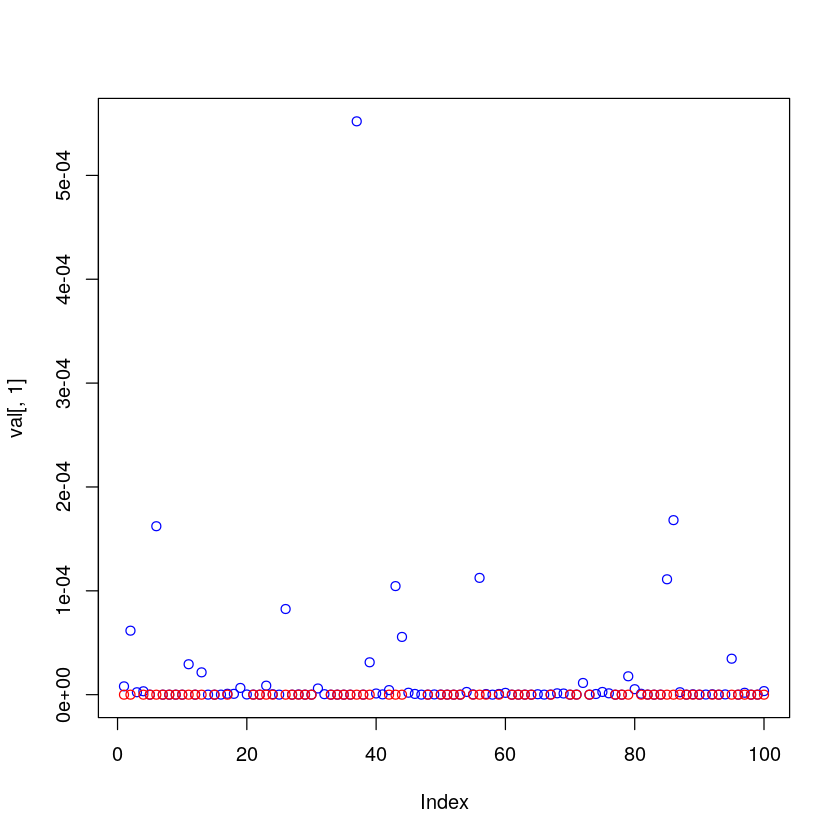

In [19]:
plot(val[,1],col = "blue")
points(val[,2], col = "red")